In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [3]:
df = pd.read_excel("/content/1730285881-Airbnb_Open_Data.xlsx")

In [6]:
# Remove $ from price and service fee, convert to numeric
df['price'] = df['price'].replace('[$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[$,]', '', regex=True).astype(float)

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Fill missing values for simplicity in analysis
df['neighbourhood group'].fillna('Unknown', inplace=True)
df['neighbourhood'].fillna('Unknown', inplace=True)
df['host_identity_verified'].fillna('unconfirmed', inplace=True)
df['review rate number'].fillna(0, inplace=True)

df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 102058 entries, 0 to 102057
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102058 non-null  int64         
 1   NAME                            101788 non-null  object        
 2   host id                         102058 non-null  int64         
 3   host_identity_verified          102058 non-null  object        
 4   host name                       101652 non-null  object        
 5   neighbourhood group             102058 non-null  object        
 6   neighbourhood                   102058 non-null  object        
 7   lat                             102050 non-null  float64       
 8   long                            102050 non-null  float64       
 9   country                         101526 non-null  object        
 10  country code                    101927 non-null  object      

/tmp/ipython-input-2354684208.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['neighbourhood group'].fillna('Unknown', inplace=True)
/tmp/ipython-input-2354684208.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

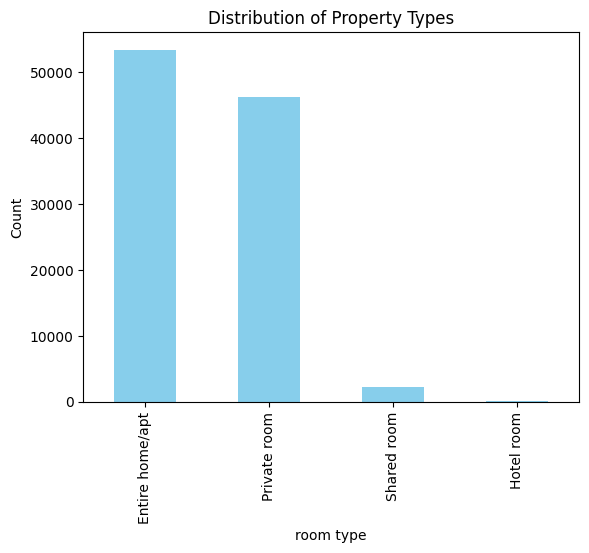

In [7]:
df['room type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Distribution of Property Types")
plt.ylabel("Count")
plt.show()


/tmp/ipython-input-3886251265.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='neighbourhood group', order=df['neighbourhood group'].value_counts().index, palette="viridis")


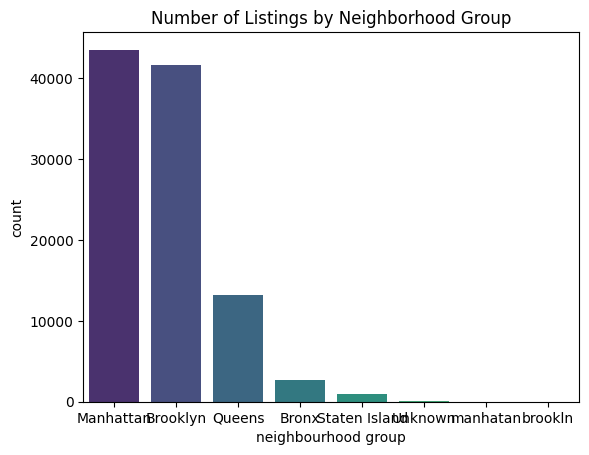

In [8]:
sns.countplot(data=df, x='neighbourhood group', order=df['neighbourhood group'].value_counts().index, palette="viridis")
plt.title("Number of Listings by Neighborhood Group")
plt.show()


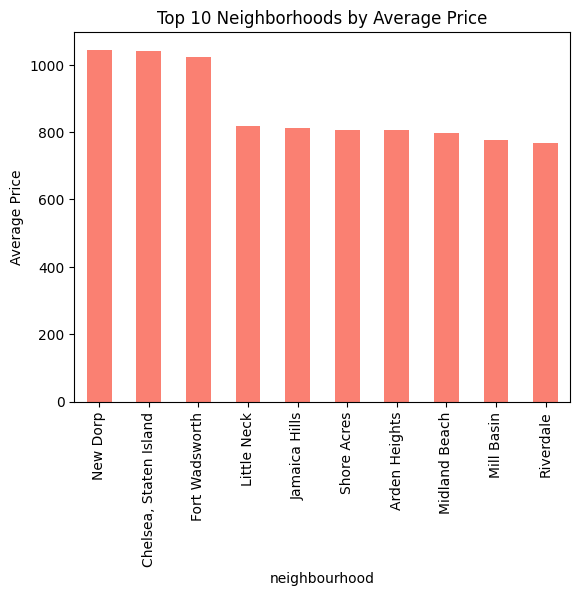

In [9]:
top_prices = df.groupby('neighbourhood')['price'].mean().sort_values(ascending=False).head(10)
top_prices.plot(kind='bar', color='salmon')
plt.title("Top 10 Neighborhoods by Average Price")
plt.ylabel("Average Price")
plt.show()

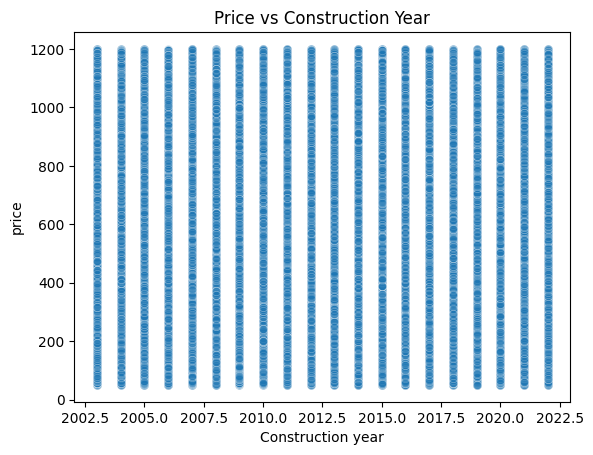

In [10]:
sns.scatterplot(data=df, x='Construction year', y='price', alpha=0.3)
plt.title("Price vs Construction Year")
plt.show()


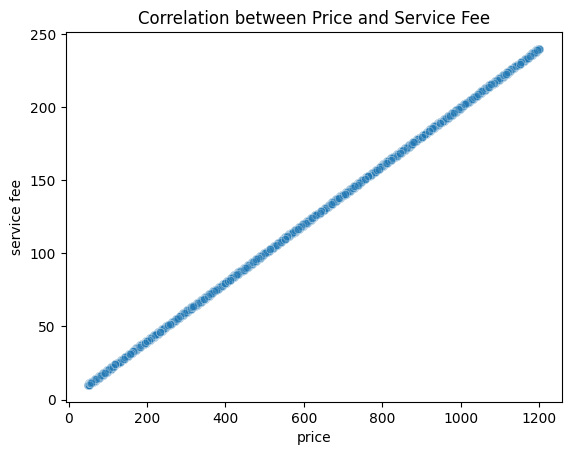

,price,service fee
price,1.000000,0.999991
service fee,0.999991,1.000000


In [13]:
sns.scatterplot(data=df, x='price', y='service fee', alpha=0.3)
plt.title("Correlation between Price and Service Fee")
plt.show()

correlation = df[['price','service fee']].corr()
correlation